In [1]:
%matplotlib inline
# magic command inline 

import matplotlib.pyplot as plt
import pandas as pd
# import dependencies

In [2]:
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"
# create reference variables to our csv files

In [3]:
city_data_df = pd.read_csv(city_data_to_load)
# read the csv file "city_data_to_load" into city dataframe
city_data_df.head(10)
# display the first ten rows of the dataframe

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
# read the csv file "ride_data_to_load" into ride dataframe
ride_data_df.head(10)
# display the first ten rows of the dataframe

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
## before merging our dataframes, we want to explore them to make sure the data is clean and there are no missing values
# first, the city dataframe:

city_data_df.count(), city_data_df.isnull().sum()
# count the number of rows in the city dataframe
# shows a count of any cells out of each row that may be empty

(city            120
 driver_count    120
 type            120
 dtype: int64,
 city            0
 driver_count    0
 type            0
 dtype: int64)

In [6]:
city_data_df.dtypes
# gather data types of each column in city dataframe

city            object
driver_count     int64
type            object
dtype: object

In [7]:
city_data_df["type"].unique()
# gather the unique values from the row that contains the types of city

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
sum(city_data_df["type"]=="Urban"), sum(city_data_df["type"]=="Suburban"), sum(city_data_df["type"]=="Rural")
# get the number of data points from the "Urban" city types
# get the number of data points from the "Suburban" city types
# get the number of data points from the "Rural" city types

(66, 36, 18)

In [9]:
# now inspect the data for the fare dataframe

ride_data_df.count(), ride_data_df.isnull().sum()
# count the number of rows in the fare dataframe
# shows a count of any cells out of each row that may be empty

(city       2375
 date       2375
 fare       2375
 ride_id    2375
 dtype: int64,
 city       0
 date       0
 fare       0
 ride_id    0
 dtype: int64)

In [10]:
ride_data_df.dtypes
# gather the data types of each column in fare dataframe

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [11]:
## now that we have inspected our dataframes, we can merge them for analysis

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# merge the two dataframes on the "city" column, with the constraint "left"

pyber_data_df.head()
# display the master dataframe's first five entries

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
## our origin dataframes merged, we can now do a quick visual analysis using a bubble chart. This will be most easily 
## achieved using separate dataframes for each type of city

urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
# create the urban, suburban, and rural type dataframes

urban_cities_df.head(), suburban_cities_df.head(), rural_cities_df.head()
# display the first few lines of each dataframe so we know what we're working with

(                 city                 date   fare        ride_id  \
 0  Lake Jonathanshire  2019-01-14 10:14:22  13.83  5739410935873   
 1  South Michelleport  2019-03-04 18:24:09  30.24  2343912425577   
 2  Port Samanthamouth  2019-02-24 04:29:00  33.44  2005065760003   
 3          Rodneyfort  2019-02-10 23:22:03  23.44  5149245426178   
 4          South Jack  2019-03-06 04:28:35  34.58  3908451377344   
 
    driver_count   type  
 0             5  Urban  
 1            72  Urban  
 2            57  Urban  
 3            34  Urban  
 4            46  Urban  ,
                city                 date   fare        ride_id  driver_count  \
 1625  Barronchester  2019-01-27 03:08:01  27.79  6653622887913            11   
 1626  East Kentstad  2019-04-07 19:44:19  18.75  6575961095852            20   
 1627      Lake Omar  2019-01-17 21:33:35  21.71   966911700371            22   
 1628     Myersshire  2019-02-27 17:38:39  17.10  5706770909868            19   
 1629    West Hannah  

In [13]:
## now we want to generate a ride count for each city by each type of city. This will eventually represent our x-axis

urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
# creates three series that count the number of rides for each city, grouped by city and categorized by city type

urban_ride_count.head(), suburban_ride_count.head(), rural_ride_count.head()

(city
 Amandaburgh        18
 Barajasview        22
 Carriemouth        27
 Christopherfurt    27
 Deanville          19
 Name: ride_id, dtype: int64,
 city
 Barronchester    16
 Bethanyland      18
 Brandonfort      19
 Colemanland      22
 Davidfurt        17
 Name: ride_id, dtype: int64,
 city
 Bradshawfurt      10
 Garzaport          3
 Harringtonfort     6
 Jessicaport        6
 Lake Jamie         6
 Name: ride_id, dtype: int64)

In [14]:
## now we want the average city fare by each type of city. This will eventually represent our y-axis

urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
# creates three series that average the city fare data, grouped by city and categorized by city type

urban_avg_fare.head(), suburban_avg_fare.head(), rural_avg_fare.head()

(city
 Amandaburgh        24.641667
 Barajasview        25.332273
 Carriemouth        28.314444
 Christopherfurt    24.501852
 Deanville          25.842632
 Name: fare, dtype: float64,
 city
 Barronchester    36.422500
 Bethanyland      32.956111
 Brandonfort      35.437368
 Colemanland      30.894545
 Davidfurt        31.995882
 Name: fare, dtype: float64,
 city
 Bradshawfurt      40.064000
 Garzaport         24.123333
 Harringtonfort    33.470000
 Jessicaport       36.013333
 Lake Jamie        34.358333
 Name: fare, dtype: float64)

In [15]:
## with the info we already have, we can create a simple scatterplot. If we gather some data about the number of drivers
## per city, we can see how rides and fare data are affected by the number of drivers in an area

urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
# creates three series that average the driver counts by city, grouped by city an categorized by city type

urban_driver_count.head(), suburban_driver_count.head(), rural_driver_count.head()

(city
 Amandaburgh        12.0
 Barajasview        26.0
 Carriemouth        52.0
 Christopherfurt    41.0
 Deanville          49.0
 Name: driver_count, dtype: float64,
 city
 Barronchester    11.0
 Bethanyland      22.0
 Brandonfort      10.0
 Colemanland      23.0
 Davidfurt        23.0
 Name: driver_count, dtype: float64,
 city
 Bradshawfurt      7.0
 Garzaport         7.0
 Harringtonfort    4.0
 Jessicaport       1.0
 Lake Jamie        4.0
 Name: driver_count, dtype: float64)

Text(42, 35, 'Note: Circle size correlates with driver count per city.')

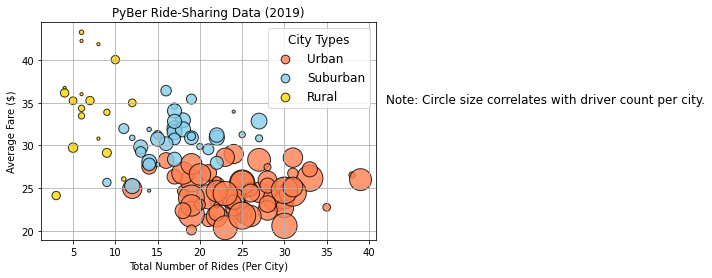

In [16]:
## now that we've gathered all the necessary variables for our graphs, let's create them. If we need to visualize each
## scatterplot separately, we can use separate cells and do them one at a time. In the same cell, however, they will stack

# build the scatterplot for urban cities
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

# build the scatterplot for suburban cities
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

# build the scatterplot for rural cities
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

## notice there's an issue with the markers in our legend, though. This is because the marker in legend is sized according
## to the average marker size for that city type. We can format this by adding a constructor

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

In [17]:
plt.savefig("analysis/Fig1.png")
# this will save the png to the folder "analysis" in the jupyter folder. Make sure there is a folder named "analysis"

<Figure size 432x288 with 0 Axes>

In [18]:
## now that the data are nicely gathered and visualized, we can further describe the analysis with summary statistics

urban_cities_df.describe(), suburban_cities_df.describe(), rural_cities_df.describe()
# use describe() function to gather summary statistics from each city type dataframe

(              fare       ride_id  driver_count
 count  1625.000000  1.625000e+03   1625.000000
 mean     24.525772  4.873485e+12     36.678154
 std      11.738649  2.907440e+12     20.075545
 min       4.050000  1.458810e+10      3.000000
 25%      14.550000  2.400244e+12     22.000000
 50%      24.640000  4.711188e+12     37.000000
 75%      34.580000  7.451579e+12     52.000000
 max      44.970000  9.991538e+12     73.000000,
              fare       ride_id  driver_count
 count  625.000000  6.250000e+02    625.000000
 mean    30.970128  4.971015e+12     13.712000
 std     10.677508  2.912410e+12      8.042372
 min     12.050000  3.218337e+08      1.000000
 25%     21.970000  2.364253e+12      5.000000
 50%     30.750000  5.053221e+12     16.000000
 75%     39.830000  7.551674e+12     21.000000
 max     49.960000  9.917744e+12     25.000000,
              fare       ride_id  driver_count
 count  125.000000  1.250000e+02    125.000000
 mean    34.623440  4.647746e+12      4.296000
 s

In [19]:
urban_ride_count.describe(), suburban_ride_count.describe(), rural_ride_count.describe()
# gather summary statistics of ride count dataframes

(count    66.000000
 mean     24.621212
 std       5.408726
 min      12.000000
 25%      21.000000
 50%      24.000000
 75%      28.000000
 max      39.000000
 Name: ride_id, dtype: float64,
 count    36.000000
 mean     17.361111
 std       4.323707
 min       9.000000
 25%      14.000000
 50%      17.000000
 75%      19.250000
 max      27.000000
 Name: ride_id, dtype: float64,
 count    18.000000
 mean      6.944444
 std       2.508157
 min       3.000000
 25%       5.250000
 50%       6.000000
 75%       8.750000
 max      12.000000
 Name: ride_id, dtype: float64)

In [20]:
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)
# if we want only a piece of summary statistics, like just the mean rounded to two decimal places

(24.62, 17.36, 6.94)

In [21]:
round(urban_ride_count.median()), round(suburban_ride_count.median()), round(rural_ride_count.median())
# just the median from summary statistics, rounded to zero decimal places

(24, 17, 6)

In [22]:
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()
# found the mode of each city type dataset. It is possible to have n modes

(0    22
 1    25
 Name: ride_id, dtype: int64,
 0    17
 Name: ride_id, dtype: int64,
 0    6
 Name: ride_id, dtype: int64)

In [23]:
## optionally, we can find all these measures of central tendency using the numpy and scipy libraries

import numpy as np
import scipy.stats as sts
# import dependences

In [24]:
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")
# calculate the measures of central tendency for the ride count for the urban cities

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [25]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")
median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")
# calculate the measures of central tendency for the ride count for the suburban cities

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [26]:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")
# calculate the measures of central tendency for the ride count for the rural cities

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [27]:
## let's also check out the summary stats for average fare in each city type

urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
# retrieve fares for varioues cities

urban_fares.head(), suburban_fares.head(), rural_fares.head()

(0    13.83
 1    30.24
 2    33.44
 3    23.44
 4    34.58
 Name: fare, dtype: float64,
 1625    27.79
 1626    18.75
 1627    21.71
 1628    17.10
 1629    37.78
 Name: fare, dtype: float64,
 2250    43.22
 2251    12.42
 2252    54.85
 2253    47.90
 2254    51.80
 Name: fare, dtype: float64)

In [28]:
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")
# calculate the measures of central tendency for the average fare for the urban cities

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [29]:
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")
median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")
# calculate the measures of central tendency for the average fare for the suburban cities

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [30]:
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")
median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")
# calculate the measures of central tendency for the average fare for the rural cities

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [31]:
## let's also check summary stats for driver count by city type, just do the same thing, but with 'driver_count'

urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
# get the driver count data from each city type

urban_drivers.head(), suburban_drivers.head(), rural_drivers.head()

(0     5
 1    72
 2    57
 3    34
 4    46
 Name: driver_count, dtype: int64,
 1625    11
 1626    20
 1627    22
 1628    19
 1629    12
 Name: driver_count, dtype: int64,
 2250    9
 2251    8
 2252    6
 2253    2
 2254    2
 Name: driver_count, dtype: int64)

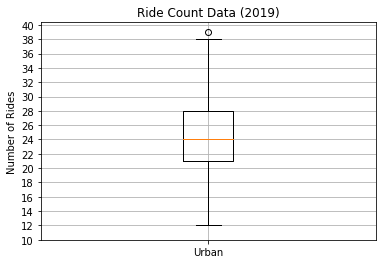

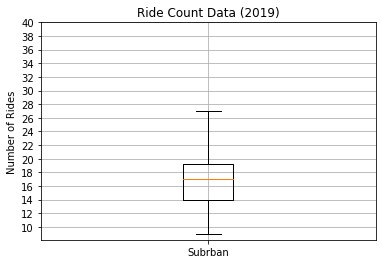

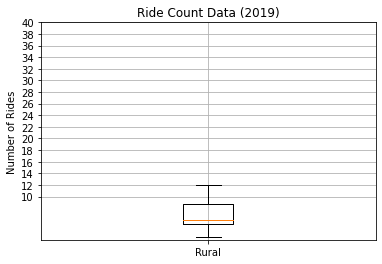

In [32]:
## one last piece of analysis we can perform are box-and-whisker plots

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()
# create a box-and-whisker plot for the urban cities ride count

x_labels = ["Subrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()
# create a box-and-whisker plot for the suburban cities ride count

x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()
# create a box-and-whisker plot for the rural cities ride count

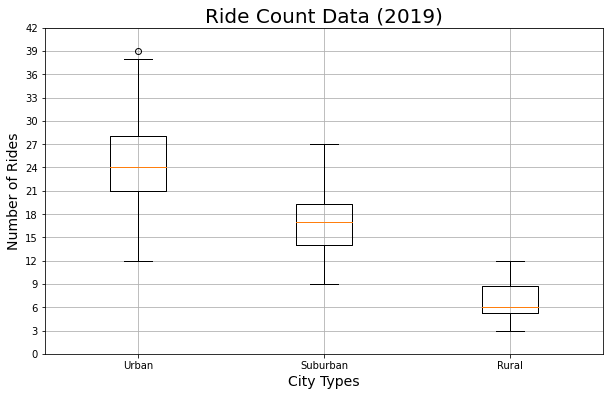

In [33]:
## To show all the city type box-and-whisker plots on one chart we need to modify the boxplot() function and add other 
## features. We will increase the size of the chart and the font of the title and axes labels.

x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()
# add all ride count box-and-whisker plots to the same graph.

In [34]:
## we see an outlier in the data set, which we identified as the city with the highest count of all the ride count data.
## We can find this information quicker in the future by using

urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
# returns which value in "city" column has a 39 in the row adjacent
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


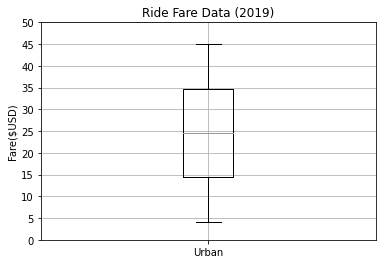

Summary Statistics


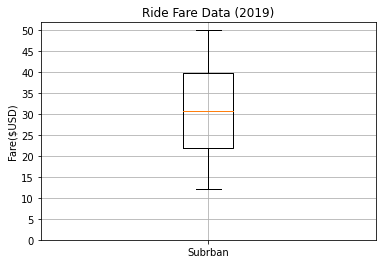

Summary Statistics


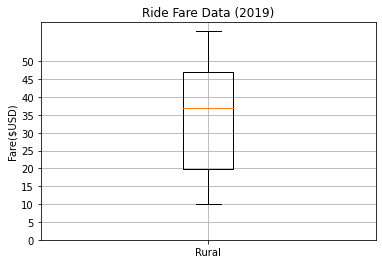

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [35]:
## now we can do box-and_whisker charts for ride fare data

x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()
# create a box-and-whisker plot for the urban fare data.

x_labels = ["Subrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()
# create a box-and-whisker plot for the suburban fare data.

x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()
# create a box-and-whisker plot for the rural fare data.

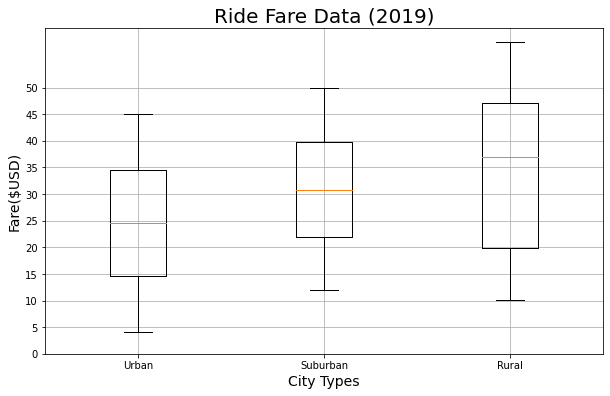

In [36]:
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare($USD)', fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()
# add all ride count box-and-whisker plots to the same graph.

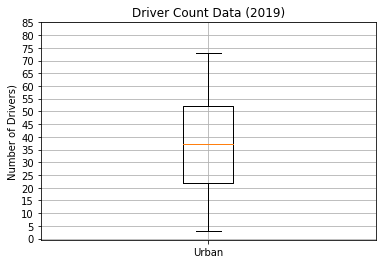

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [37]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

In [38]:
## pie charts aren't usually a great tool for analysis, but they are good for showing percentages

# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
# we start by grouping by city type for the index, and sum the fares for each city type 
total_fares = pyber_data_df["fare"].sum()
# next, gather the total sum of fares. We'll divide against this to calculate our percentages
type_percents = 100 * sum_fares_by_type / total_fares
# divide the 'sum_fares_by_type' values by 'total_fares' variable, and multiply by 100 to get the percentage series
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [39]:
## this can also be achieved with a single line of code

type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

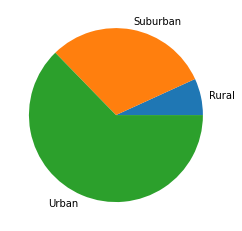

In [40]:
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
# build the pie chart with percentages and labels
plt.show()

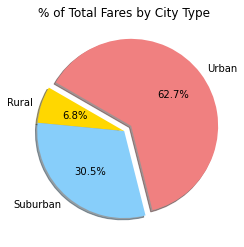

In [41]:
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# more formatting to make it pretty

plt.show()

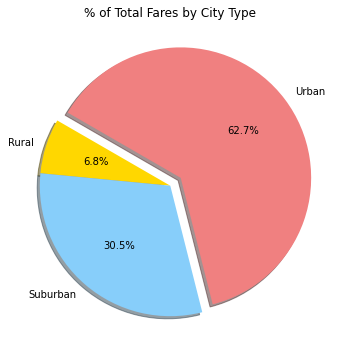

In [42]:
import matplotlib as mpl
# import mpl dependency to change the plot configurations using rcParams

plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# create and format the pie chart
mpl.rcParams['font.size'] = 14
# Change the default font size from 10 to 14.
plt.savefig("analysis/Fig5.png")
# Save Figure
plt.show()
# display figure